In [6]:
!python -m spacy download es_core_news_sm

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.9/12.9 MB 8.0 MB/s eta 0:00:0000:0100:01

[notice] A new release of pip is available: 24.3.1 -> 25.2
[notice] To update, run: pip install --upgrade pip
✔ Download and installation successful
You can now load the package via spacy.load('es_core_news_sm')


In [7]:
import pandas as pd
import spacy
from sklearn.feature_extraction.text import TfidfVectorizer

nlp = spacy.load("es_core_news_sm")

In [8]:
def preprocesar(texto: str) -> str:
    doc = nlp(texto.lower())
    tokens_limpios = [
        token.lemma_
        for token in doc
        if not token.is_stop and token.is_alpha
    ]
    return " ".join(tokens_limpios)

df = pd.read_csv("../data/comentarios.csv")

df["comentario_procesado"] = df["texto_comentario"].apply(preprocesar)

# Vectorización con TF-IDF
vectorizer = TfidfVectorizer()
X_tfidf = vectorizer.fit_transform(df["comentario_procesado"])

In [9]:
print("Vocabulario:", vectorizer.get_feature_names_out())
print("\nMatriz TF-IDF (shape):", X_tfidf.shape)

# Mostrar como DataFrame
tfidf_df = pd.DataFrame(
    X_tfidf.toarray(),
    columns=vectorizer.get_feature_names_out()
)
print("\nMatriz TF-IDF:\n", tfidf_df)

Vocabulario: ['abrir' 'absoluto' 'absorbente' 'absorber' 'acabado' 'acción' 'acero'
 'acolchado' 'acontecimiento' 'adaptar' 'adecuado' 'adición' 'adictivo'
 'aficionado' 'agarre' 'agotar' 'agradable' 'agua' 'aguantar' 'agudo'
 'aire' 'aislante' 'ajustabl' 'ajustado' 'ajustar' 'alimento'
 'almohadilla' 'altavoz' 'alto' 'amante' 'ambiente' 'amigo' 'amir'
 'amortiguar' 'amplio' 'animación' 'antiadherente' 'apagado' 'apagar'
 'aparecer' 'aparte' 'aplicación' 'apretar' 'archivo' 'arco' 'armario'
 'arrepientir' 'arrugar' 'arruinar' 'asa' 'asiento' 'asombroso' 'aspecto'
 'atractivo' 'audio' 'auricular' 'autonomía' 'autor' 'auténtico' 'avanza'
 'aventura' 'ayuda' 'ayudar' 'año' 'bajo' 'balón' 'barato' 'base'
 'batería' 'bestia' 'bestial' 'bicicleta' 'bloatware' 'bloquear'
 'bluetooth' 'bolsillo' 'bonito' 'borde' 'borrar' 'borroso' 'brillante'
 'buceo' 'busca' 'buscar' 'básico' 'caber' 'cable' 'caer' 'cafetería'
 'calentar' 'calidad' 'calor' 'calzado' 'cambio' 'caminar' 'caminata'
 'camiseta' '

/var/folders/sl/2x216nz107xcfzxlmr7tr47m0000gn/T/ipykernel_44254/3265052097.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="peso", y="palabra", data=df_top, palette="viridis")


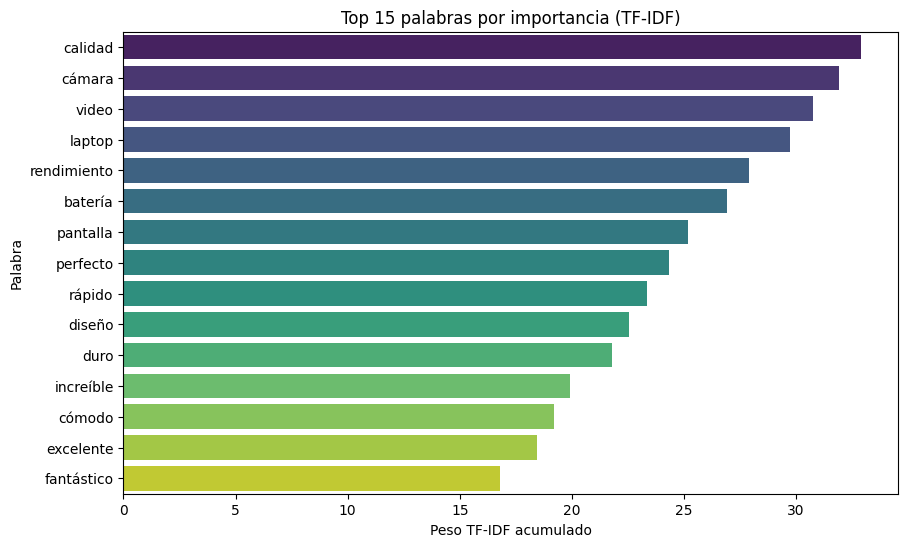

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Sumar TF-IDF por término en todos los documentos
suma_tfidf = X_tfidf.toarray().sum(axis=0)
palabras = vectorizer.get_feature_names_out()
df_tfidf = pd.DataFrame({"palabra": palabras, "peso": suma_tfidf})

# Ordenar por importancia
top_n = 15
df_top = df_tfidf.sort_values("peso", ascending=False).head(top_n)

# Visualización
plt.figure(figsize=(10,6))
sns.barplot(x="peso", y="palabra", data=df_top, palette="viridis")
plt.title(f"Top {top_n} palabras por importancia (TF-IDF)")
plt.xlabel("Peso TF-IDF acumulado")
plt.ylabel("Palabra")
plt.show()